# Customer Segmentation - Feature Engineering
## Preparing Data for Clustering Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
df = pd.read_csv("../data/processed/explored_customers.csv")
print("Data loaded successfully!")
print(f"Dataset shape: {df.shape}")

Data loaded successfully!
Dataset shape: (200, 5)


## Data Quality Check
Verifying data integrity before feature engineering.

In [6]:
print("Missing values check:")
print(df.isnull().sum())

print("\nData types:")
print(df.dtypes)

df.head()

Missing values check:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Data types:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Feature Selection for Clustering
Choosing relevant features for customer segmentation.

In [17]:
features_for_clustering = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

clustering_df = df[features_for_clustering].copy()

print("Selected features for clustering:")
print(clustering_df.columns.tolist())
clustering_df.head()

Selected features for clustering:
['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Feature Engineering
Creating new features that might improve clustering.

In [18]:
clustering_df['Spending_Income_Ratio'] = clustering_df['Spending Score (1-100)'] / clustering_df['Annual Income (k$)']

clustering_df['Age_Group'] = pd.cut(clustering_df['Age'], 
                                   bins=[0, 30, 45, 60, 100], 
                                   labels=['Young', 'Adult', 'Middle-aged', 'Senior'])

age_group_dummies = pd.get_dummies(clustering_df['Age_Group'], prefix='age')
clustering_df = pd.concat([clustering_df, age_group_dummies], axis=1)

print("New features created:")
print(clustering_df.columns.tolist())
clustering_df.head()

New features created:
['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Spending_Income_Ratio', 'Age_Group', 'age_Young', 'age_Adult', 'age_Middle-aged', 'age_Senior']


,Age,Annual Income (k$),Spending Score (1-100),Spending_Income_Ratio,Age_Group,age_Young,age_Adult,age_Middle-aged,age_Senior
0,19,15,39,2.600000,Young,True,False,False,False
1,21,15,81,5.400000,Young,True,False,False,False
2,20,16,6,0.375000,Young,True,False,False,False
3,23,16,77,4.812500,Young,True,False,False,False
4,31,17,40,2.352941,Adult,False,True,False,False


## Feature Scaling
Standardizing features for better clustering performance.

In [20]:
features_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Spending_Income_Ratio']

scaler = StandardScaler()

scaled_features = scaler.fit_transform(clustering_df[features_to_scale])

scaled_df = pd.DataFrame(scaled_features, columns=[f'{col}_scaled' for col in features_to_scale])

final_df = pd.concat([clustering_df, scaled_df], axis=1)

print("Features scaled successfully!")
print("Scaled features statistics:")
print(scaled_df.describe())

Features scaled successfully!
Scaled features statistics:
         Age_scaled  Annual Income (k$)_scaled  Spending Score (1-100)_scaled  \
count  2.000000e+02               2.000000e+02                   2.000000e+02   
mean  -1.021405e-16              -2.131628e-16                  -1.465494e-16   
std    1.002509e+00               1.002509e+00                   1.002509e+00   
min   -1.496335e+00              -1.738999e+00                  -1.910021e+00   
25%   -7.248436e-01              -7.275093e-01                  -5.997931e-01   
50%   -2.045351e-01               3.587926e-02                  -7.764312e-03   
75%    7.284319e-01               6.656748e-01                   8.851316e-01   
max    2.235532e+00               2.917671e+00                   1.894492e+00   

       Spending_Income_Ratio_scaled  
count                    200.000000  
mean                       0.000000  
std                        1.002509  
min                       -1.087288  
25%                   

## Compare Scaling Methods
Testing both StandardScaler and MinMaxScaler.

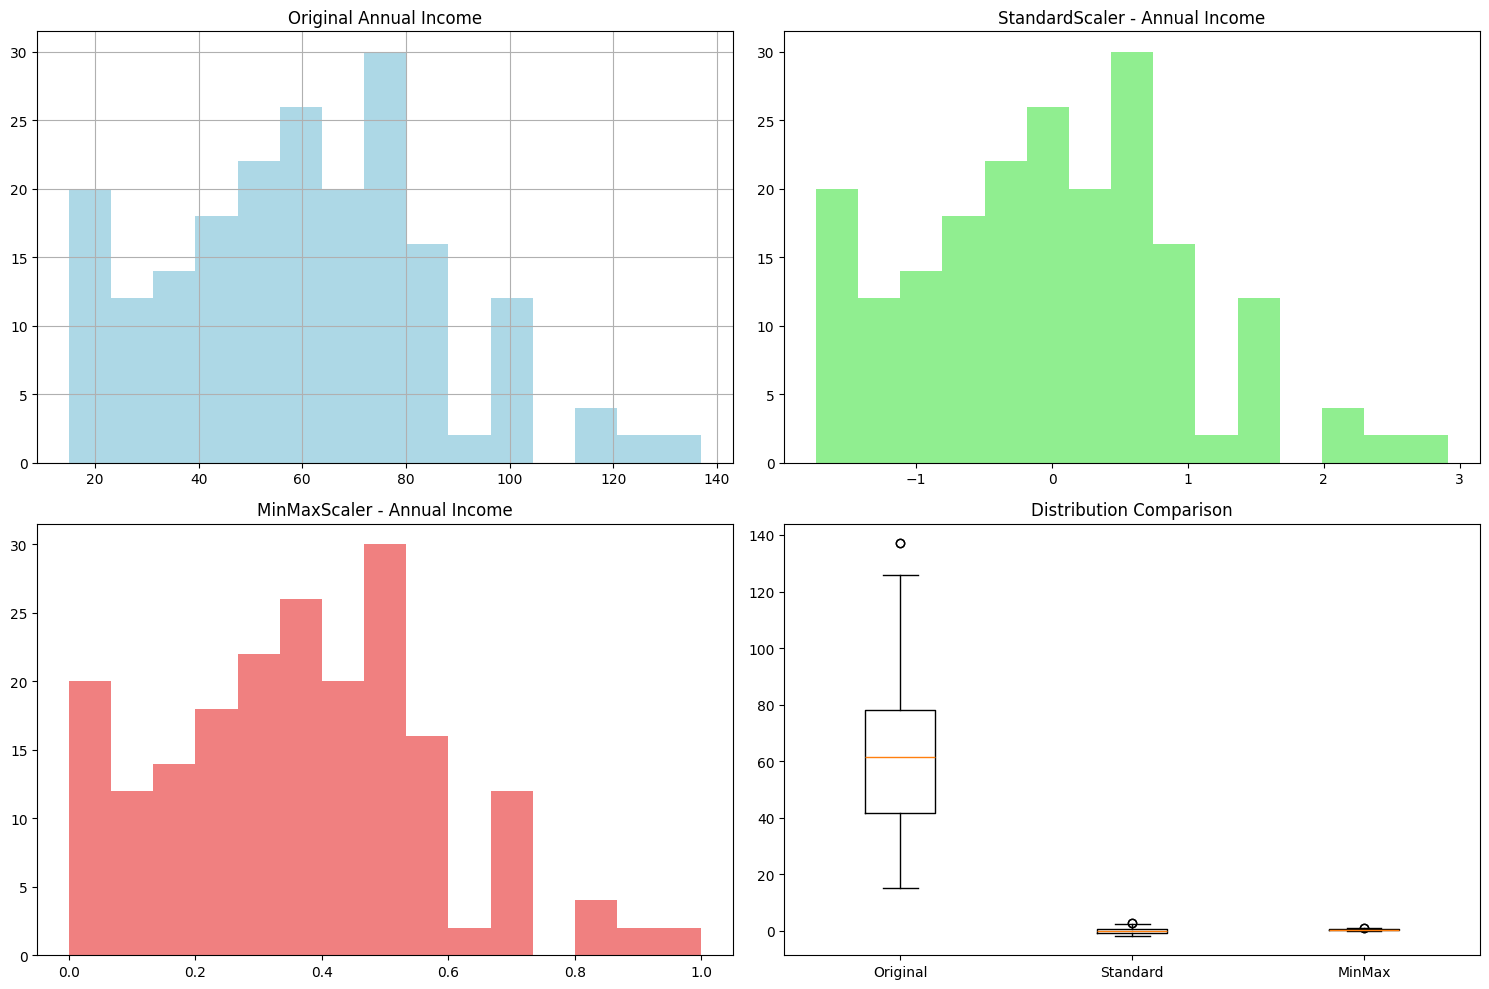

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Original data
clustering_df['Annual Income (k$)'].hist(ax=axes[0,0], bins=15, color='lightblue')
axes[0,0].set_title('Original - Annual Income')

# StandardScaler
scaled_standard = StandardScaler().fit_transform(clustering_df[['Annual Income (k$)']])
axes[0,1].hist(scaled_standard, bins=15, color='lightgreen')
axes[0,1].set_title('StandardScaler - Annual Income')

# MinMaxScaler
scaled_minmax = MinMaxScaler().fit_transform(clustering_df[['Annual Income (k$)']])
axes[1,0].hist(scaled_minmax, bins=15, color='lightcoral')
axes[1,0].set_title('MinMaxScaler - Annual Income')

# Compare distributions
axes[1,1].boxplot([clustering_df['Annual Income (k$)'].values, scaled_standard.flatten(), scaled_minmax.flatten()], 
                 tick_labels=['Original', 'Standard', 'MinMax'])
axes[1,1].set_title('Distribution Comparison')

plt.tight_layout()
plt.show()

## Final Dataset Preparation
Creating the final dataset for modeling.

In [24]:
final_features = ['Age_scaled', 'Annual Income (k$)_scaled', 'Spending Score (1-100)_scaled']

modeling_df = final_df[final_features].copy()

print("Final features for clustering:")
print(modeling_df.columns.tolist())
print(f"Final dataset shape: {modeling_df.shape}")
modeling_df.head()

Final features for clustering:
['Age_scaled', 'Annual Income (k$)_scaled', 'Spending Score (1-100)_scaled']
Final dataset shape: (200, 3)


,Age_scaled,Annual Income (k$)_scaled,Spending Score (1-100)_scaled
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## Save Processed Data

In [25]:
modeling_df.to_csv("../data/processed/modeling_customers.csv", index=False)

final_df.to_csv("../data/processed/featured_customers.csv", index=False)

print("Data saved successfully!")
print("modeling_customers.csv - Ready for clustering")
print("featured_customers.csv - Full feature set for reference")

Data saved successfully!
modeling_customers.csv - Ready for clustering
featured_customers.csv - Full feature set for reference


## Summary
- **Selected Features**: Age, Annual Income, Spending Score
- **New Features**: Spending-to-Income Ratio, Age Groups
- **Scaling Method**: StandardScaler chosen for better outlier handling
- **Final Dataset**: 3 scaled features ready for clustering algorithms

**Next Step**: Proceed to model training and clustering analysis.